### Attempting to remove stopwords before splitting the line lyrics by Token
#### Unsuccessful

In [1]:
# Import libraries and upload OHCO (by line) #
import pandas as pd
import numpy as np
import os

df = pd.read_csv('artist_song_verse_line_OHCO_df_FULL.csv') # includes corpus with no duplicate song names

In [2]:
df.head()

,artist_id,song_id,verse_num,line_num,Line
0,0,0,0,0,"Look at her face, it's a wonderful face"
1,0,0,0,1,And it means something special to me
2,0,0,0,2,Look at the way that she smiles when she sees me
3,0,0,0,3,How lucky can one fellow be?
4,0,0,1,0,"She's just my kind of girl, she makes me feel ..."


In [3]:
# Try the method on a subset first
sub = df[df['artist_id']==261]

In [4]:
sub=sub.set_index(['artist_id', 'song_id','verse_num','line_num'])

In [5]:
TOKEN_PAT = r'(\W+)'
tokens = sub.Line.str.split(TOKEN_PAT, expand=True)\
    .stack()\
    .to_frame()\
    .rename(columns={0:'token_str'})
tokens.index.names = ['artist_id', 'song_id','verse_num','line_num','token_num']
tokens['punc'] = tokens.token_str.str.match(r'^\W*$').astype('int')

In [7]:
tokens.head()

token_str  punc
artist_id song_id verse_num line_num token_num                
261       26476   0         0        0               Why     0
                                     1                       1
                                     2               are     0
                                     3                       1
                                     4               you     0

In [8]:
#remove punctuation
no_punc = tokens[tokens.punc == 0]

In [9]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('tagsets')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
stemmer = nltk.stem.porter.PorterStemmer()
no_punc['port_stem'] = no_punc.token_str.apply(lambda x: stemmer.stem(x))

C:\Users\karan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [12]:
no_stop=pd.DataFrame(no_punc[-no_punc.port_stem.isin(stop)])

In [13]:
no_stop.head()

token_str  punc port_stem
artist_id song_id verse_num line_num token_num                          
261       26476   0         0        0               Why     0       whi
                                     8          paranoid     0  paranoid
                            1        8          paranoid     0  paranoid
                  1         0        0              Baby     0      babi
                                     6             worry     0     worri

In [14]:
token_counts = no_stop[tokens.punc == 0].port_stem.str.lower().value_counts()

C:\Users\karan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [15]:
token_counts.head()

i       2455
like     450
know     422
get      351
got      274
Name: port_stem, dtype: int64

In [16]:
vocab = no_stop[tokens.punc == 0].port_stem.value_counts().to_frame()\
    .reset_index()\
    .rename(columns={'index':'port_stem', 'port_stem':'n'})
vocab = vocab.sort_values('port_stem').reset_index()
vocab.index.name = 'term_id'
vocab = vocab.drop('index', 1)

C:\Users\karan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [48]:
vocab.sort_values('n', ascending=False).head(25)

,port_stem,n,df,tf_sum,tf_mean,tf_max,tfidf_sum,tfidf_mean,tfidf_max,tfth_sum,tfth_mean,tfth_max,th_sum,th_mean,th_max
term_id,,,,,,,,,,,,,,,
86,I,2455,105,9.419329,0.088862,0.195644,0.128809,0.001215,0.002675,296.360608,2.795855,6.155539,31.463027,0.296821,0.460486
2111,like,450,88,1.627976,0.015358,0.076086,0.437093,0.004124,0.020428,14.282586,0.134741,0.667520,8.773215,0.082766,0.282753
2020,know,422,79,1.625274,0.015333,0.107141,0.689343,0.006503,0.045443,13.377002,0.126198,0.881833,8.230614,0.077647,0.345252
1517,get,351,75,1.171336,0.011050,0.147221,0.584616,0.005515,0.073478,7.462964,0.070405,0.937991,6.371329,0.060107,0.406910
1573,got,274,78,0.973791,0.009187,0.089230,0.430920,0.004065,0.039486,5.645323,0.053258,0.517288,5.797266,0.054691,0.311084
3598,thi,263,81,1.009137,0.009520,0.059760,0.391616,0.003694,0.023191,6.061462,0.057184,0.358953,6.006580,0.056666,0.242905
1552,go,205,66,0.764693,0.007214,0.063288,0.522688,0.004931,0.043259,3.469872,0.032735,0.287175,4.537600,0.042808,0.252008
3127,see,197,63,0.741515,0.006995,0.038960,0.556611,0.005251,0.029245,3.287971,0.031019,0.172754,4.434126,0.041831,0.182405
2091,let,193,57,0.715763,0.006752,0.080567,0.640629,0.006044,0.072110,2.957261,0.027899,0.332873,4.131623,0.038978,0.292754


In [49]:
K=no_stop

In [50]:
K

token_str  punc port_stem  \
artist_id song_id verse_num line_num token_num                               
261       26476   0         0        0                 Why     0       whi   
                                     8            paranoid     0  paranoid   
                            1        8            paranoid     0  paranoid   
                  1         0        0                Baby     0      babi   
                                     6               worry     0     worri   
                            1        0                 Hey     0       hey   
                                     8                even     0      even   
                                     10              think     0     think   
                  2         0        2               worry     0     worri   
                                     4                bout     0      bout   
                                     8               wrong     0     wrong   
                                     10             things     0     thing   
                                     14              wrong     0     wrong   
                                     16             things     0     thing   
                            1        2               worry     0     worri   
                                     4                bout     0      bout   
                                     8               wrong     0     wrong   
                                     10             things     0     thing   
                                     14              wrong     0     wrong   
                                     16             things     0     thing   
                            2        2               worry     0     worri   
                                     4                bout     0      bout   
                                     8               wrong     0     wrong   
                                     10             things     0     thing   
                                     14              wrong     0     wrong   
                                     16             things     0     thing   
                            3        2               worry     0     worri   
                                     4                bout     0      bout   
                                     8               wrong     0     wrong   
                                     10             things     0     thing   
...                                                    ...   ...       ...   
          26581   3         26       6               stunt     0     stunt   
                                     10               stay     0      stay   
                                     12           glorious     0   gloriou   
                            27       2                   I     0         I   
                                     6               gonna     0     gonna   
                                     8                stop     0      stop   
                                     10            killing     0      kill   
                                     14             niggas     0     nigga   
                                     16               soon     0      soon   
                                     22             chorus     0     choru   
                                     24                hit     0       hit   
                  4         0        6               south     0     south   
                                     8                side     0      side   
                                     16               west     0      west   
                                     18               side     0      side   
                  5         0        0                Yeah     0      yeah   
                                     2                   I     0         I   
                                     6                stop     0      stop   
                                     8             killing     0      k

In [51]:
V=vocab

In [52]:
K['term_id'] = K['port_stem'].map(V.reset_index().set_index('port_stem').term_id).fillna(-1).astype('int')

In [53]:
OHCO = ['artist_id', 'song_id', 'verse_num', 'line_num','token_num']

In [54]:
SONG=OHCO[1:2]

In [55]:
SONG

['song_id']

In [27]:
BOW = K.groupby(SONG+['term_id'])['term_id'].count()

In [57]:
BOW.head()

song_id  term_id
26476    47          1
         86         14
         115         2
         125         1
         129         1
Name: term_id, dtype: int64

In [58]:
DTM = BOW.unstack().fillna(0)

In [59]:
DTM

term_id,0,1,2,3,4,5,6,7,8,9,...,4043,4044,4045,4046,4047,4048,4049,4050,4051,4052
song_id,,,,,,,,,,,,,,,,,,,,,
26476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26483,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
alpha = .000001 # We introduce an arbitrary smoothing value
alpha_sum = alpha * V.shape[0]
TF = DTM.apply(lambda x: (x + alpha) / (x.sum() + alpha_sum), axis=1)

In [61]:
TF.head()

term_id,0,1,2,3,4,5,6,7,8,9,...,4043,4044,4045,4046,4047,4048,4049,4050,4051,4052
song_id,,,,,,,,,,,,,,,,,,,,,
26476,4.081565e-09,4.081565e-09,4.081565e-09,4.081565e-09,4.081565e-09,4.081565e-09,4.081565e-09,4.081565e-09,4.081565e-09,4.081565e-09,...,4.081565e-09,4.081565e-09,4.081565e-09,4.081565e-09,4.081565e-09,4.081565e-09,4.081565e-09,4.081565e-09,4.081565e-09,4.081565e-09
26477,9.523442e-09,9.523442e-09,9.523442e-09,9.523442e-09,9.523442e-09,9.523442e-09,9.523442e-09,9.523442e-09,9.523442e-09,9.523442e-09,...,9.523442e-09,9.523442e-09,9.523442e-09,9.523442e-09,9.523442e-09,9.523442e-09,9.523442e-09,9.523442e-09,9.523442e-09,9.523442e-09
26478,3.436378e-09,3.436378e-09,3.436378e-09,3.436378e-09,3.436378e-09,3.436378e-09,3.436378e-09,3.436378e-09,3.436378e-09,3.436378e-09,...,3.436378e-09,3.436378e-09,3.436378e-09,3.436378e-09,3.436378e-09,3.436378e-09,3.436378e-09,3.436378e-09,3.436378e-09,3.436378e-09
26479,7.812253e-09,7.812253e-09,7.812253e-09,7.812253e-09,7.812253e-09,7.812253e-09,7.812253e-09,7.812253e-09,7.812253e-09,7.812253e-09,...,7.812253e-09,7.812253e-09,7.812260e-03,7.812253e-09,7.812253e-09,7.812253e-09,7.812253e-09,7.812253e-09,7.812253e-09,7.812253e-09
26480,2.967323e-09,2.967323e-09,2.967323e-09,2.967323e-09,2.967323e-09,2.967323e-09,2.967323e-09,2.967323e-09,2.967323e-09,2.967323e-09,...,2.967323e-09,2.967323e-09,2.967323e-09,2.967323e-09,2.967323e-09,2.967323e-09,2.967323e-09,2.967323e-09,2.967323e-09,2.967323e-09


In [62]:
N_docs = DTM.shape[0]
V['df'] = DTM[DTM > 0].count()
TFIDF = TF * np.log2(N_docs / V['df'])

In [63]:
TFIDF.head()

term_id,0,1,2,3,4,5,6,7,8,9,...,4043,4044,4045,4046,4047,4048,4049,4050,4051,4052
song_id,,,,,,,,,,,,,,,,,,,,,
26476,2.337888e-08,2.746045e-08,1.390178e-08,2.337888e-08,2.746045e-08,2.746045e-08,2.337888e-08,2.746045e-08,1.334055e-08,2.337888e-08,...,2.746045e-08,2.746045e-08,2.746045e-08,2.746045e-08,2.746045e-08,2.746045e-08,2.746045e-08,1.929732e-08,2.337888e-08,2.746045e-08
26477,5.454952e-08,6.407296e-08,3.243677e-08,5.454952e-08,6.407296e-08,6.407296e-08,5.454952e-08,6.407296e-08,3.112726e-08,5.454952e-08,...,6.407296e-08,6.407296e-08,6.407296e-08,6.407296e-08,6.407296e-08,6.407296e-08,6.407296e-08,4.502608e-08,5.454952e-08,6.407296e-08
26478,1.968330e-08,2.311968e-08,1.170428e-08,1.968330e-08,2.311968e-08,2.311968e-08,1.968330e-08,2.311968e-08,1.123176e-08,1.968330e-08,...,2.311968e-08,2.311968e-08,2.311968e-08,2.311968e-08,2.311968e-08,2.311968e-08,2.311968e-08,1.624692e-08,1.968330e-08,2.311968e-08
26479,4.474796e-08,5.256021e-08,2.660847e-08,4.474796e-08,5.256021e-08,5.256021e-08,4.474796e-08,5.256021e-08,2.553426e-08,4.474796e-08,...,5.256021e-08,5.256021e-08,5.256027e-02,5.256021e-08,5.256021e-08,5.256021e-08,5.256021e-08,3.693571e-08,4.474796e-08,5.256021e-08
26480,1.699659e-08,1.996392e-08,1.010668e-08,1.699659e-08,1.996392e-08,1.996392e-08,1.699659e-08,1.996392e-08,9.698663e-09,1.699659e-08,...,1.996392e-08,1.996392e-08,1.996392e-08,1.996392e-08,1.996392e-08,1.996392e-08,1.996392e-08,1.402927e-08,1.699659e-08,1.996392e-08


In [64]:
THM = -(TF * np.log2(TF))
TFTH = TF.apply(lambda x: x * THM.sum(), 1)

In [65]:
V['tf_sum'] = TF.sum()
V['tf_mean'] = TF.mean()
V['tf_max'] = TF.max()
V['tfidf_sum'] = TFIDF.sum()
V['tfidf_mean'] = TFIDF.mean()
V['tfidf_max'] = TFIDF.max()
V['tfth_sum'] = TFTH.sum()
V['tfth_mean'] = TFTH.mean()
V['tfth_max'] = TFTH.max()
V['th_sum'] = THM.sum()
V['th_mean'] = THM.mean()
V['th_max'] = THM.max()

In [66]:
V

,port_stem,n,df,tf_sum,tf_mean,tf_max,tfidf_sum,tfidf_mean,tfidf_max,tfth_sum,tfth_mean,tfth_max,th_sum,th_mean,th_max
term_id,,,,,,,,,,,,,,,
0,0,2,2,0.009045,0.000085,0.006493,0.051808,0.000489,0.037193,0.000626,5.902692e-06,0.000449,0.069176,0.000653,0.047186
1,000,1,1,0.002611,0.000025,0.002611,0.017570,0.000166,0.017566,0.000059,5.523231e-07,0.000059,0.022419,0.000212,0.022405
2,1,11,10,0.040398,0.000381,0.008772,0.137595,0.001298,0.029877,0.012774,1.205049e-04,0.002774,0.316192,0.002983,0.059937
3,10,2,2,0.005502,0.000052,0.002890,0.031513,0.000297,0.016555,0.000257,2.428812e-06,0.000135,0.046796,0.000441,0.024377
4,1000,3,1,0.017752,0.000167,0.017751,0.119431,0.001127,0.119428,0.001833,1.729157e-05,0.001833,0.103253,0.000974,0.103239
5,11,2,1,0.006452,0.000061,0.006452,0.043409,0.000410,0.043405,0.000303,2.858148e-06,0.000303,0.046956,0.000443,0.046942
6,15,2,2,0.005934,0.000056,0.003322,0.033988,0.000321,0.019029,0.000295,2.786186e-06,0.000165,0.049773,0.000470,0.027354
7,18,1,1,0.002552,0.000024,0.002551,0.017166,0.000162,0.017163,0.000056,5.293206e-07,0.000056,0.021990,0.000207,0.021976
8,2,12,11,0.050363,0.000475,0.008772,0.164610,0.001553,0.028670,0.019419,1.832016e-04,0.003382,0.385591,0.003638,0.059937


In [67]:
#Find significant words

In [68]:
TOPS = pd.DataFrame(index=range(10))
for m in ['tf','tfidf','tfth', 'th']:
    for n in ['mean','max']:
        key = '{}_{}'.format(m,n)
        TOPS[key] = V.sort_values(key, ascending=False).port_stem.head(10).tolist()

In [69]:
TOPS

,tf_mean,tf_max,tfidf_mean,tfidf_max,tfth_mean,tfth_max,th_mean,th_max
0,I,hey,hey,gwaan,I,I,I,hey
1,like,kany,oh,amazin,like,hey,like,kany
2,know,oh,kany,dem,know,get,know,oh
3,get,I,light,hey,get,know,get,I
4,thi,away,love,southsid,thi,like,thi,away
5,got,fli,gwaan,oh,got,kany,got,fli
6,love,dem,dem,fingernail,go,love,go,dem
7,hey,get,amazin,matchin,see,got,see,get
8,go,gwaan,away,toe,love,oh,wa,gwaan
9,see,amazin,la,kany,wa,say,say,amazin


In [70]:
#Compare Chapters
#Create Songs Table

In [71]:
def get_songs(tokens, div_names, doc_str = 'term_id', sep='', flatten=False, 
             index_only=False):
    
    if not index_only:
        docs = tokens.groupby(div_names)[doc_str]\
          .apply(lambda x: x.str.cat(sep=sep))
        docs.columns = ['doc_content']
    else:
        docs = tokens.groupby(div_names)[doc_str].apply(lambda x: x.tolist())

    if flatten:
        docs = docs.reset_index().drop(div_names, 1)
    
    return docs

In [72]:
D = get_songs(K, SONG, 'port_stem', sep=" ")\
    .to_frame().rename(columns={'port_stem':'song_str'})

In [73]:
D.head()

,song_str
song_id,
26476,whi paranoid paranoid babi worri hey even thin...
26477,know I wa wait wait dream never come true know...
26478,It wait peopl pay paper damn stand want someth...
26479,I know like feel littl girl I hope someon lift...
26480,featur common hook My rap better My plaqu bett...


In [74]:
D['term_count'] = DTM.sum(1).astype('int').to_frame().rename(columns={0:'term_count'})
D['tf'] = D.term_count / D.term_count.sum()

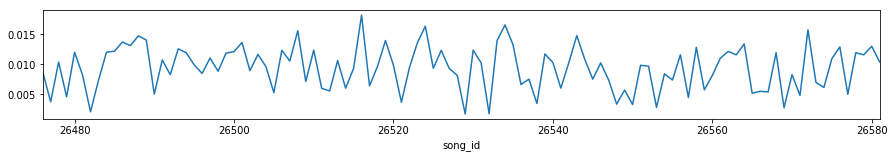

In [75]:
D.tf.plot(figsize=(15,2))

# Get all doc pairs

In [76]:
song_ids = D.index.tolist()
pairs = [(i,j) for i in song_ids for j in song_ids if j > i]

In [77]:
P = pd.DataFrame(pairs).reset_index(drop=True).set_index([0,1])
P.index.names = ['doc_x','doc_y']

In [78]:
P.head()

Empty DataFrame
Columns: []
Index: [(26476, 26477), (26476, 26478), (26476, 26479), (26476, 26480), (26476, 26481)]

# Compute Eucledian Distance

In [79]:
def euclidean(row):
    D1 = TFIDF.loc[row.name[0]]
    D2 = TFIDF.loc[row.name[1]]
    x = (D1 - D2)**2
    y = x.sum() 
    z = np.sqrt(y)
    return z

In [80]:
P['euclidean'] = 0
P['euclidean'] = P.apply(euclidean, 1)

In [81]:
P['euclidean_sim'] = 1 / (P.euclidean + 1)
PME = P.euclidean.unstack().fillna(0)
PME.head()

doc_y,26477,26478,26479,26480,26481,26482,26483,26484,26485,26486,...,26572,26573,26574,26575,26576,26577,26578,26579,26580,26581
doc_x,,,,,,,,,,,,,,,,,,,,,
26476,0.597618,0.471872,0.657958,0.480409,0.441685,0.684417,0.533791,0.584206,0.758126,0.451302,...,0.440523,0.448433,0.475692,0.475513,0.795816,0.756348,0.473941,0.455323,0.561811,0.457436
26477,0.000000,0.547846,0.713337,0.553005,0.521859,0.747785,0.608753,0.640687,0.803453,0.532324,...,0.519752,0.549498,0.527726,0.577048,0.841642,0.805481,0.534661,0.543942,0.634246,0.536831
26478,0.000000,0.000000,0.611445,0.408752,0.386858,0.646639,0.480461,0.526552,0.719920,0.380535,...,0.369393,0.398053,0.405836,0.441704,0.758271,0.714664,0.408867,0.389320,0.506754,0.384966
26479,0.000000,0.000000,0.000000,0.611951,0.593262,0.787296,0.658094,0.693315,0.849246,0.593513,...,0.582029,0.602092,0.611445,0.637728,0.884182,0.848121,0.604822,0.595790,0.678301,0.593519
26480,0.000000,0.000000,0.000000,0.000000,0.388168,0.649234,0.483194,0.498912,0.719840,0.390302,...,0.373425,0.397446,0.415468,0.448443,0.757437,0.716593,0.413837,0.398879,0.504996,0.388110


# Compute Cosine Similarity

In [82]:
def cosine(row):
    D1 = TFIDF.loc[row.name[0]]
    D2 = TFIDF.loc[row.name[1]]
    x = D1 * D2
    y = x.sum()
    
#     a = np.sqrt(D1.sum()**2)     # <-- misplaced exponent!
#     b = np.sqrt(D2.sum()**2)     # <-- misplaced exponent!
#     c = np.sqrt(a) * np.sqrt(b)  # <-- extra square roots!

    a = np.sqrt((D1**2).sum())
    b = np.sqrt((D2**2).sum())
    c = a * b
    
    z = y / c
    return z

In [83]:
from numpy.linalg import norm
def cosine_np(row):
    D1 = TFIDF.loc[row.name[0]]
    D2 = TFIDF.loc[row.name[1]]
    return np.dot(D1, D2)/(norm(D1)*norm(D2))

from scipy import spatial
def cosine_scipy(row):
    D1 = TFIDF.loc[row.name[0]]
    D2 = TFIDF.loc[row.name[1]]
    return (1 - spatial.distance.cosine(D1, D2))

from sklearn.metrics.pairwise import cosine_similarity
def cosine_sklearn(row):
    D1 = TFIDF.loc[row.name[0]]
    D2 = TFIDF.loc[row.name[1]]
    return cosine_similarity([TFIDF.loc[0]], [TFIDF.loc[1]])[0][0]


In [84]:

# %%timeit -- 11.8 s ± 958 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
P['cosine'] = P.apply(cosine, 1)

# %%timeit -- 7.23 s ± 877 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
P['cosine_scipy'] = P.apply(cosine_scipy, 1)

# %%timeit -- 39.6 s ± 3.27 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
P['cosine_sklearn'] = P.apply(cosine_sklearn, 1)

# %%timeit -- 4.48 s ± 480 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
P['cosine_np'] = P.apply(cosine_np, 1)

P.head()


KeyError: (0, 'occurred at index (26476, 26477)')

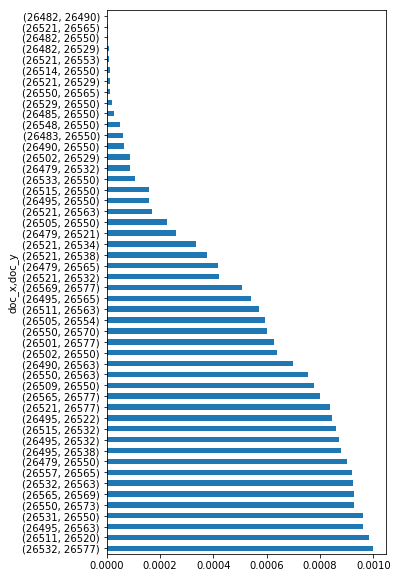

In [86]:
PMC = P.cosine.unstack().fillna(0)
PMC.head()
P.cosine.sort_values(ascending=False).tail(50).plot(kind='barh', figsize=(5,10))